
# Project: Investigate a Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

#### Questions analysed using the dataset: 

1. Which movie has the minimum and the maximum profit?
2. Which movie has the highest and the lowest revenue?
3. Which movies has the highest and the lowest budget?
4. What is the average profit trend over the years?
5. What is the average runtime and the overall runtime distribution of all the movies?
6. What is the Top 5 Genres list based on the profitable movies (profit >= $100M) ?
7. What is the Top 5 casts list based on the profitable movies?
8. What is the Top 5 directors list based on the profitable movies?
9. What is the average budget of the profitable movies?
10. What is the average revenue of the profitable movies?

In [587]:
#Importing all the packages needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> After analysing the dataset, we will be cleaning and deleating the irrelevent data to make our analysis simpler.

In [588]:
#Reading csv file
df= pd.read_csv("C:/Users/Mukta Parab/Downloads/tmdb-movies.csv")

#Print first 5 rows to take a look of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [589]:
#Number of rows and columns in the Dataframe
df.shape

(10866, 21)

In [590]:
#Taking a look at the datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [591]:
#Statistical data

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [592]:
#Checking for the duplicate or repeated records
df.duplicated().sum()

1

In [593]:
df.duplicated(subset=['id']).sum()

1

In [594]:
#Checking for the total number of missing values across the column

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

In [595]:
#Deleting the duplicate record

tmdb_df= df.drop_duplicates()
tmdb_df.duplicated().sum()

0

In [596]:
tmdb_df.shape

(10865, 21)

In [597]:
#Drop certain columns which are not needed for the analysis

tmdb_df = tmdb_df.drop(['imdb_id','homepage','tagline','keywords','overview','vote_count','vote_average','budget_adj','revenue_adj'],axis=1)
tmdb_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [598]:
#Number of rows and columns after removing the duplicates and few columns
tmdb_df.shape

(10865, 12)

In [599]:
#Checking the datatypes
tmdb_df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
release_year              int64
dtype: object

In [600]:
#Converting the release_date datatype to datetime

tmdb_df.release_date=pd.to_datetime(tmdb_df['release_date'])
tmdb_df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

In [601]:
#Removing 0s from the budget and revenue column

temp=['budget', 'revenue']
tmdb_df[temp] = tmdb_df[temp].replace(0, np.NaN)

#Drop NaN values
tmdb_df.dropna(subset = temp, inplace = True)

tmdb_df.shape

(3854, 12)

<a id='eda'></a>
## Exploratory Data Analysis

Calculating profit of each movie

In [602]:
tmdb_df['profit']=tmdb_df['revenue']-tmdb_df['budget']
tmdb_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.316249e+09


### Research Question 1: Which movie has the minimum and the maximum profit?

In [603]:
#Movie with maximum profit

tmdb_df.loc[tmdb_df['profit'].idxmax()]
#print(tmdb_df['profit'].max())

id                                                                  19995
popularity                                                        9.43277
budget                                                           2.37e+08
revenue                                                       2.78151e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
release_year                                                         2009
profit                                                        2.54451e+09
Name: 1386, dtype: object

The movie with the highest profit is 'Avatar' (id number 19995) and has a profit of 2544505847 dollars.

In [604]:
#Movie with minimum profit
tmdb_df.loc[tmdb_df['profit'].idxmin()]
#print(tmdb_df['profit'].min())

id                                                                  46528
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
release_year                                                         2010
profit                                                       -4.13912e+08
Name: 2244, dtype: object

The movie with the lowest profit is 'The Warrior's Way' (id number 46528) and has a profit of -413912431.0 that is, a loss of 413912431 dollars.

### Research Question 2: Which movie has highest and the lowest revenue?

In [605]:
#Movie with the highest revenue
tmdb_df.loc[tmdb_df['revenue'].idxmax()]
#print(tmdb_df['revenue'].max())

id                                                                  19995
popularity                                                        9.43277
budget                                                           2.37e+08
revenue                                                       2.78151e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
release_year                                                         2009
profit                                                        2.54451e+09
Name: 1386, dtype: object

The movie with the highest revenue is 'Avatar' (id number 19995), having the revenue of 2781505847 dollars.

In [606]:
#Movie with the lowest revenue
tmdb_df.loc[tmdb_df['revenue'].idxmin()]
#print(tmdb_df['revenue'].min())

id                                                                  13537
popularity                                                       0.462609
budget                                                              6e+06
revenue                                                                 2
original_title                                            Shattered Glass
cast                    Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                        Billy Ray
runtime                                                                94
genres                                                      Drama|History
production_companies    Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date                                          2003-11-14 00:00:00
release_year                                                         2003
profit                                                             -6e+06
Name: 5067, dtype: object

The movie with the lowest revenue is 'Shattered Glass' (id number 13537), having the revenue of 2.0 dollars.

### Research Question 3: Which movie the highest and the lowest budget?

In [607]:
#Movie with the highest budget
tmdb_df.loc[tmdb_df['budget'].idxmax()]
#print(tmdb_df['budget'].max())

id                                                                  46528
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
release_year                                                         2010
profit                                                       -4.13912e+08
Name: 2244, dtype: object

The movie with the highest budget is 'The Warrior's Way' (id number 46528), having the budget of 425000000 dollars.

In [608]:
#Movie with the lowest budget
tmdb_df.loc[tmdb_df['budget'].idxmin()]
#print(tmdb_df['budget'].min())

id                                                                  39964
popularity                                                       0.090186
budget                                                                  1
revenue                                                               100
original_title                                               Lost & Found
cast                    David Spade|Sophie Marceau|Ever Carradine|Step...
director                                                     Jeff Pollack
runtime                                                                95
genres                                                     Comedy|Romance
production_companies             Alcon Entertainment|Dinamo Entertainment
release_date                                          1999-04-23 00:00:00
release_year                                                         1999
profit                                                                 99
Name: 2618, dtype: object

The movie with the lowest budget of is 'Lost & Found' (id number 39964), having the budget of 1.0 dollar.

### Research Question 4: What is the average profit trend over the years?

In [609]:
avg_profit_by_year = tmdb_df.groupby('release_year')['profit'].mean()    

In [610]:
avg_profit_by_year

release_year
1960    2.163961e+07
1961    2.990832e+07
1962    2.383998e+07
1963    1.923531e+07
1964    4.209691e+07
1965    7.985637e+07
1966    1.049374e+07
1967    4.894882e+07
1968    1.869686e+07
1969    5.171575e+07
1970    4.127909e+07
1971    2.586805e+07
1972    5.715449e+07
1973    8.814051e+07
1974    5.004477e+07
1975    8.980081e+07
1976    4.196177e+07
1977    9.175308e+07
1978    5.912353e+07
1979    5.939563e+07
1980    4.356807e+07
1981    4.400838e+07
1982    6.968294e+07
1983    4.855077e+07
1984    4.365329e+07
1985    4.065607e+07
1986    3.469489e+07
1987    4.670754e+07
1988    4.058029e+07
1989    7.066551e+07
1990    6.518689e+07
1991    6.096243e+07
1992    7.307634e+07
1993    6.355317e+07
1994    7.587717e+07
1995    6.923578e+07
1996    5.507705e+07
1997    7.089157e+07
1998    5.732767e+07
1999    5.545870e+07
2000    5.764882e+07
2001    6.629789e+07
2002    7.090228e+07
2003    7.605087e+07
2004    6.681977e+07
2005    5.680646e+07
2006    5.163491e+07


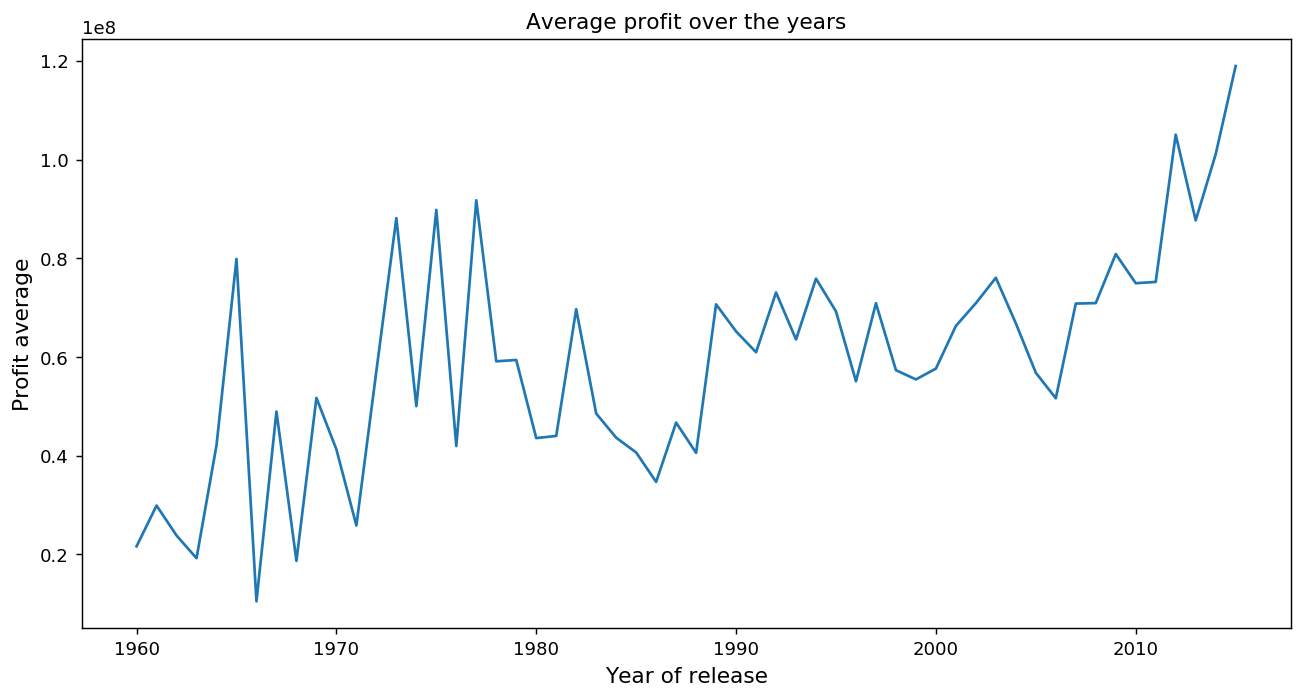

In [611]:
#Initialize the plot

plt.figure(figsize=(12,6), dpi = 130)

#Set labels
plt.xlabel('Year of release', fontsize = 12)
plt.ylabel('Profit average', fontsize = 12, )

#Set title
plt.title('Average profit over the years')

plt.plot(avg_profit_by_year)

#Show the plot
plt.show()

As it can be seen, the average profit trend is fluctuating over the years. Also, it can be observed from the bar chart that the year 1966 has the lowest average of the profit and the year 2015 has the highest average of the profit. 

### Research Question 5: What is the average runtime and the overall runtime distribution of all the movies?

In [612]:
#Calculate average runtime
tmdb_df['runtime'].mean()

109.22029060716139

The average runtime of all the movies is 109.22 minutes.

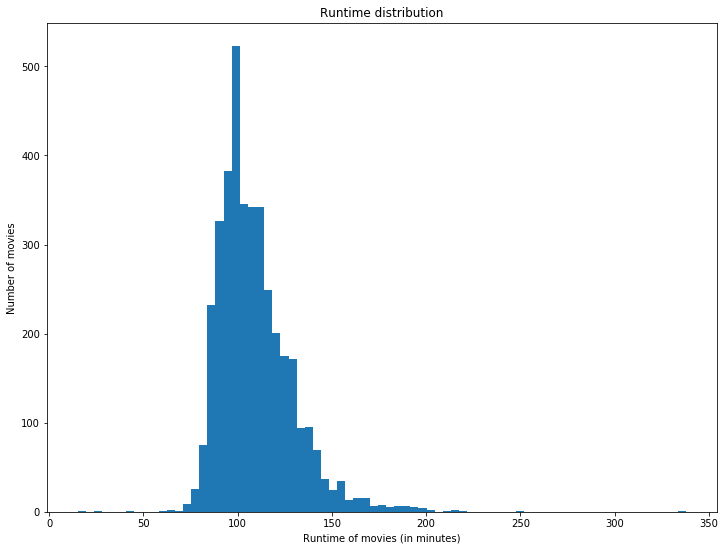

In [613]:
#Runtime Distribution

#Set size
plt.figure(figsize = (12, 9))

#Set title
plt.title('Runtime distribution')

#x-label and y-label
plt.xlabel('Runtime of movies (in minutes)')
plt.ylabel('Number of movies')

#Plot histogram
plt.hist(tmdb_df['runtime'], bins=75)
plt.show()

From the above graph, it can be said that, most of the movies have a runtime between 100 to 140 minutes.

### Research Question 6: Top 5 Genres based on the profitable movies

Profitable movies are the movies that achieved a profit greater than or equal to 100M dollars.

In [614]:
#Segregating the movies having profit greater than or equal to 100M dollars
profitable_movies=tmdb_df[tmdb_df['profit']>=100000000]

#Indexing
profitable_movies.index = range(len(profitable_movies))

In [615]:
#Printing first 5 profitable_movies

profitable_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.316249e+09


In [616]:
#Total number of movies having profit greater than or equal to 100M dollars

len(profitable_movies)

826

There are 826 movies who earned a profit greater than or equal to 100 dollars.

In [617]:
#Creating a concatenated string of all the genres
genres = profitable_movies['genres'].str.cat(sep = '|')

#Spilt the string and strore it in the panda series
genres= pd.Series(genres.split('|'))

#Calculate the count of each genre
count = genres.value_counts(ascending = False)

In [618]:
top_5_genre=count.head()
top_5_genre

Action       317
Comedy       299
Adventure    278
Drama        264
Thriller     233
dtype: int64

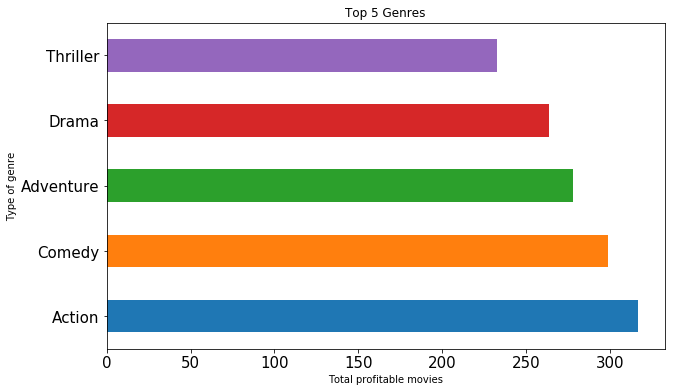

In [619]:
# Initialize the plot
plt.figure(figsize=(10,6))
diagram = top_5_genre.plot.barh(fontsize = 15)
# Set a title
diagram.set(title = 'Top 5 Genres')
# x-label and y-label
diagram.set_ylabel('Type of genre')
diagram.set_xlabel('Total profitable movies')
# Show the plot
plt.show()

The horizontal bar graph shows that out of the profitable movies (profit >= 100 dollars), most of the movies (317 movies) were of the Action genre, followed by Comedy genere at the second spot (299 movies).

Thriller based movies stood at the last place in the top 5 genre list, having a total of 233 profitable movies.

### Research Question 7: Top 5 casts based on the profitable movies

Profitable movies are the movies that achieved a profit greater than or equal to 100M dollars.

In [620]:
#Creating a concatenated string of all the cast members in the profitable movies
cast_members=profitable_movies['cast'].str.cat(sep='|')

#Spliting the string and storing it into a panda series
cast_members=pd.Series(cast_members.split('|'))
cast_members

#Count the occurance of top 10 casts in the profitable movies
top_5_casts=cast_members.value_counts(ascending = False).head()
top_5_casts

Tom Cruise            23
Tom Hanks             19
Brad Pitt             18
Adam Sandler          17
Sylvester Stallone    16
dtype: int64

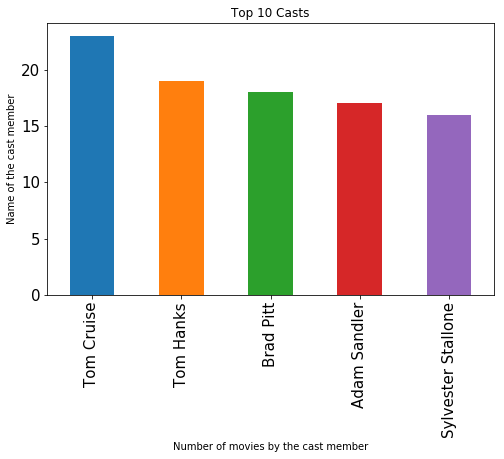

In [621]:
# Initialize the plot
plt.figure(figsize=(8,5))
diagram = top_5_casts.plot.bar(fontsize = 15)
# Set a title
diagram.set(title = 'Top 10 Casts')
# x-label and y-label
diagram.set_ylabel('Name of the cast member')
diagram.set_xlabel('Number of movies by the cast member')
# Show the plot
plt.show()

The bar graph shows that Tom Cruise of was featured in 23 of the profitable movies, followed by Tom Hanks, Brad Pitt, Adam Sandler and Sylvester Stallone.

### Research Question 8: Top 5 Directors with profitable movies

Profitable movies are the movies that achieved a profit greater than or equal to 100M dollars.

In [622]:
top5_directors=profitable_movies['director'].value_counts().head()
top5_directors

Steven Spielberg      22
Robert Zemeckis       10
Michael Bay            8
Ridley Scott           7
M. Night Shyamalan     7
Name: director, dtype: int64

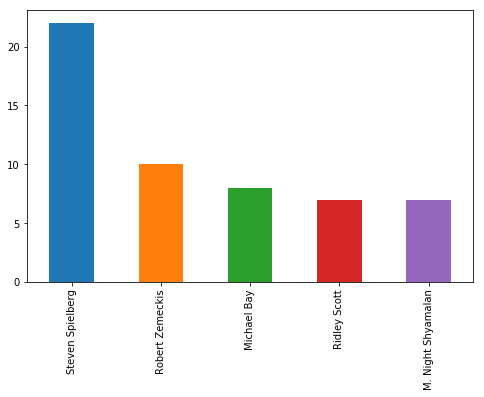

In [623]:
plt.figure(figsize=(8,5))
diagram=top5_directors.plot.bar(fontsize=10)

The bar graph shows that the director named Steven Spielberg director the highest number of profitable movies, followed by Robert Zemeckis at 2nd place and others.

### Research Question 9: Average revenue of the profitable movies

In [624]:
profitable_movies['revenue'].mean()

345328046.81961256

Average revenue of the profitable movies is 345328046.82 dollars

### Research Question 10: Average budget of the profitable movies

In [625]:
profitable_movies['budget'].mean()

74469572.77602905

Average budget of the profitable movies is 74469572.77 dollars

<a id='conclusions'></a>
## Conclusions
> **Observations**:
1. 'Avatar' made the highest profit of 2544505847 dollars and 'The Warrior's Way' made the lowest profit of -413912431.0 that is, a loss of 413912431 dollars.
2. 'Avatar' made the highest revenue of 2781505847 dollars and 'Shattered Glass' (id number 13537) had the lowest revenue of 2.0 dollars.
3. 'The Warrior's Way' had the highest budget of 425000000 dollars and the 'Lost & Found' had the lowest budget of only 1.0 dollar.
4. The year 1966 has the lowest average of the profit and the year 2015 has the highest average of the profit.
5. Average runtime is 109.22 minutes. Most of the movies have a runtime between 100 to 140 minutes.
6. There are 826 movies who earned a profit greater than or equal to 100 dollars.

> **So, to conclude we can say that, for the movie to gain a profit greater than 100M dollars, we can take the following points into consideration**:
1. Focusing on the Top 5 Genres, namely: Action, Comedy, Adventure and Drama.
2. Casts can be one of the Top 5 cast members, namely: Tom Cruise, Tom Hanks, Brad Pitt, Adam Sandler and Sylvester Stallone.
3. Directors can be one of the Top 5 Directors list: Steven Spielberg, Robert Zemeckis, Michael Bay, Ridley Scott and M. Night Shyamalan.
4. Average budget of the movie can be 74469572.77 dollars.

On the basis of above consideration, we can obtain the average revenue of around 345328046.82 dollars

>**Limitations**:
The above considerations does not necessarily mean that the movie will definitely achieve a profit of 100M dollars, as correlation does not imply causation.
We have also assumed that the units of the budget and the revenue is Dollars.
Some of the data maybe unreliable, as practically, budget of any movie cannot be just 1 dollar.
